# ¡Hola, Jorge!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px  #Cargar todas las librerías
from scipy.stats import ttest_ind 


Instrucciones para completar el proyecto

Paso 1. Abre el archivo de datos y estudia la información general 

Ruta de archivo:

/datasets/games.csv . Descarga el dataset

In [2]:
games_df = pd.read_csv('/datasets/games.csv')
games_df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Paso 2. Prepara los datos

    Reemplaza los nombres de las columnas (ponlos en minúsculas).
    Convierte los datos en los tipos necesarios. PPP
    Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.
    Si es necesario, elige la manera de tratar los valores ausentes:
        Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.
        ¿Por qué crees que los valores están ausentes? La razón por la cual en user_score no tienen calificaciones, es porque son juegos que tuvieron poca venta, por lo cual no hay reviews por parte de los usuarios.
        Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
    Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [3]:
games_df.columns = games_df.columns.str.lower() #pasar nombres de columnas a minúsculas 
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien.
</div>

In [4]:
100*games_df.isna().sum()/games_df.shape[0] #Revisión de valores ausentes

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

- Las columnas con mayor cantidad de valores ausentes, corresponden a critic_score, user_score y rating. Se recomienda que lo mejor es dejar los valores ausentes actuales o buscar en datos externos, ya que como el porcentaje es alto, se corre el riesgo de alterar la distribución de los datos.
- Para name y genre se debe analizar si los ausentes se producen en la misma fila, se debe tomar una decisión.              

In [5]:
games_df.info() #Mostrar tipos de datos por columnas mediante info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_df.describe() 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Revisión de los valores 'tbd'

In [7]:
#user_score
games_df[games_df['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Se ha decididio convertir los 'tbd' a NAN, para después intentar aplicar la imputación. 

In [8]:
games_df['user_score'] = games_df['user_score'].replace('tbd',np.nan).astype(float) #Se convierte la columna a tipo float
games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta transformación.
</div>

In [9]:
7590 / 16715

0.45408315883936584

Se observa que el 45% de los valores de la columna user_score son ausentes.

In [10]:
lego_batman = games_df[games_df['name'] =='LEGO Batman: The Videogame'].copy()

In [11]:
serie_imputacion = lego_batman.groupby('name')['year_of_release'].median() #Calcular mediana del año de estreno de lego_batman

In [12]:
lego_batman.set_index('name')['year_of_release'].fillna(serie_imputacion) #Se imputan los valores ausentes por la mediana del año de estreno del juego

name
LEGO Batman: The Videogame    2008.0
LEGO Batman: The Videogame    2008.0
LEGO Batman: The Videogame    2008.0
LEGO Batman: The Videogame    2008.0
LEGO Batman: The Videogame    2008.0
LEGO Batman: The Videogame    2008.0
LEGO Batman: The Videogame    2008.0
Name: year_of_release, dtype: float64

Se procede a sacar la mediana del year of release para todos los juegos.

In [13]:
serie_imputacion = games_df.groupby('name')['year_of_release'].median()

In [14]:
games_df['year_of_release_correcto'] = games_df.set_index('name')['year_of_release'].fillna(serie_imputacion).reset_index(drop=True) #Se imputan los valores ausentes por la mediana del año de estreno del juego

In [15]:
games_df[games_df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_correcto
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,2008.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,2008.0
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,2003.0
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,2012.0
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


Cálculo de las ventas totales.

In [16]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']
games_df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_correcto,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con este cálculo.
</div>

Paso 3. Analiza los datos

    Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
    Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
    Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
    Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
    ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
    Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
    Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
    Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
    Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [17]:
video_games = games_df.groupby('name')['platform'].count().reset_index() #Lista de juegos que son multiplataforma
video_games = video_games[video_games['platform'] > 1]
mp_games = video_games.name.unique() 

for gm in mp_games:
    duplicate_games = games_df[games_df['name'] == gm]
    print(duplicate_games['year_of_release'].mode())
    #duplicate_games.index()
    display(duplicate_games)
    break 


0    2013.0
dtype: float64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_correcto,total_sales
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.0,0.05,NaN,NaN,NaN,2013.0,0.59
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.0,0.04,NaN,NaN,NaN,2013.0,0.51


### Juegos por año

<AxesSubplot:xlabel='year_of_release'>

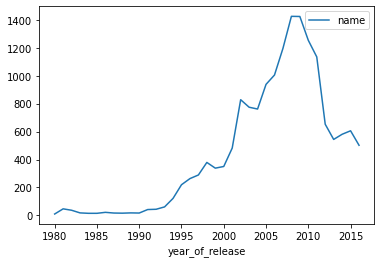

In [18]:
anual_games = games_df.groupby('year_of_release')['name'].count().reset_index()
anual_games.plot(kind = 'line', x = 'year_of_release', y = 'name')

Los datos son significativos y muestran que hay un incremento significativo de ventas de video juegos a partir del año 2000 como se muestra en la gráfica superior, y alcanza su pico más alto entre el 2005 y 2010. Durante los primeros años de lanzamiento del juego las ventas no muestran ser significativas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Perfecto!
</div>

### Ventas por plataforma

In [19]:
sales_by_console = games_df.pivot_table(index =  'platform', values = 'total_sales', aggfunc= 'sum' )
sales_by_console.sort_values(by = 'total_sales', ascending= False).head() #Mostrar el top5 de ventas por consola

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [20]:
games_df[(games_df['platform'] == 'DS') & (games_df['year_of_release'] == 1985)]
games_df = games_df.drop([15954],axis=0).reset_index(drop=True)


In [21]:
platform_list = ('PS2', 'X360', 'PS3', 'Wii', 'DS')
games_2 = games_df[games_df['platform'].isin(platform_list)]


In [22]:
platform_distribution = games_2.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
platform_distribution

,year_of_release,platform,total_sales
0,1985.0,DS,0.02
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31
5,2004.0,DS,17.27
6,2004.0,PS2,211.81
7,2005.0,DS,130.14
8,2005.0,PS2,160.66
9,2005.0,X360,8.25


In [23]:
platform_distribution = platform_distribution.drop(index=0)
platform_distribution 

,year_of_release,platform,total_sales
1,2000.0,PS2,39.17
2,2001.0,PS2,166.43
3,2002.0,PS2,205.38
4,2003.0,PS2,184.31
5,2004.0,DS,17.27
6,2004.0,PS2,211.81
7,2005.0,DS,130.14
8,2005.0,PS2,160.66
9,2005.0,X360,8.25
10,2006.0,DS,119.81


<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

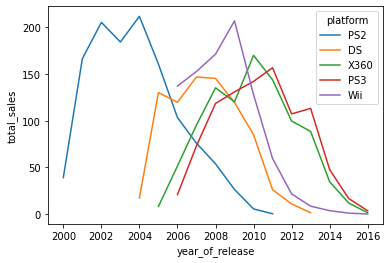

In [24]:
sns.lineplot(data = platform_distribution, x = 'year_of_release', y = 'total_sales', hue = 'platform') #Gráfico de lineas por cada consola

old_consoles = sales_by_console[sales_by_console == 0].index  #tiempo en el que se tarda en lanzar una nueva consola
consoles_life = (games_df['year_of_release'].max() - games_df['year_of_release'].min()) / (len(old_consoles) + len(games_df[games_df['platform'].isin(games_df['platform'].unique()[-5:])]))
consoles_life

El tiempo que se tarda en lanzar una platforma es de  0.72 años.

- En su mayoría las consolas tienen un ciclo de vida en el cual tienen un pico de ventas duarante sus primeros años y luego empieza a disminuir, y a la mitad de su período de vida, empiezan a salir las nuevas consolas por plataforma, y es por eso que se observa dicha disminución en las ventas. 
- Las consolas tienen un período apróximado de vida de 5 años, de acuerdo a lo detectado en el gráfico superior.
- Las consolas con mayores ventas son el PS2 y el Wii.
- Hay outliers para NDS.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
En este punto debemos realizar un filtro de años a partir de lo observado en el comportamiento del ciclo de vida de los videojuegos. Observa que se demoran en promedio 4 a 5 años en alcanzar un pico y mueren en el año 8 a 10. Debes tomar todos tus datos para aplicar este filtro y desarrollar el resto del proyecto con el dataframe ya filtrado. Sugiero un periodo no mayor a cinco años. Ten presente que si lo hacemos más largo, estaríamos perdiendo de vista el objetivo (incrementar las ventas en el 2017) enfocándonos en videojuegos y plataformas obsoletas.
</div>

### Diagrama de cajas

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

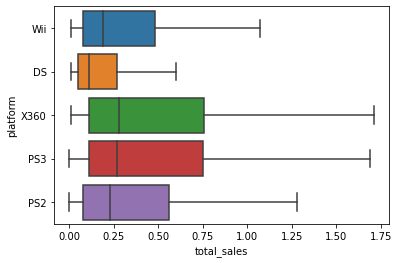

In [25]:
sns.boxplot(data = games_2, x = 'total_sales', y = 'platform', showfliers = False) #Mostrar gráfico de caja sin valores atípicos

De acuerdo a lo observado en el gráfico de cajas, el X360 y el PS3 son las consolas con mayores ventas en promedio con respecto a las demás consolas, después le siguen el PS2 y Wii.

In [26]:
average_sales = games_df.groupby('platform')['total_sales'].mean()
for platform, average_sales in average_sales.items():
    print(f"Average sales for platform '{platform}': {average_sales}")


Average sales for platform '2600': 0.7291729323308274
Average sales for platform '3DO': 0.03333333333333333
Average sales for platform '3DS': 0.4980769230769205
Average sales for platform 'DC': 0.3067307692307692
Average sales for platform 'DS': 0.3747652254765156
Average sales for platform 'GB': 2.60673469387755
Average sales for platform 'GBA': 0.38667883211678655
Average sales for platform 'GC': 0.35778776978417387
Average sales for platform 'GEN': 1.061034482758621
Average sales for platform 'GG': 0.04
Average sales for platform 'N64': 0.6855172413793098
Average sales for platform 'NES': 2.56173469387755
Average sales for platform 'NG': 0.12000000000000004
Average sales for platform 'PC': 0.26671120246659596
Average sales for platform 'PCFX': 0.03
Average sales for platform 'PS': 0.6105764411027533
Average sales for platform 'PS2': 0.5811059694585805
Average sales for platform 'PS3': 0.7059729526671662
Average sales for platform 'PS4': 0.8013775510204058
Average sales for platform 

No se refleja casi diferencia en las ventas de las primeras 5 consolas, a partir de la sexta ya se nota un cambio importante en las ventas, se puede entender que las consolas con menores ventas no despertó gran interés entre los consumidores. Para el 2017 resulta recomendable apostarle a las consolas de Play, xbox y pc.

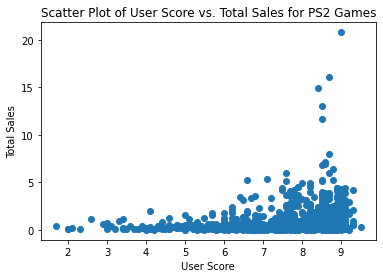

In [27]:
score_ps2 = games_df[games_df['platform'] == 'PS2']
# Se crea la grafica entre las reseñas y las ventas
plt.scatter(score_ps2['user_score'], score_ps2['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Scatter Plot of User Score vs. Total Sales for PS2 Games')
plt.show()


In [28]:
correlation = score_ps2['user_score'].corr(score_ps2['total_sales'])
print('Correlacion entre user_score y total_sales:', correlation)

Correlacion entre user_score y total_sales: 0.17286551112058213


In [29]:
gta_game = games_df[games_df['name'] == 'Grand Theft Auto: San Andreas'] #Se filtran las plataformas para comparar las ventas del juegos entre PS2 y las otras
# Total sales comparison
print('Total sales comparison:')
print(f'GTA: San Andreas (PS2): {games_df[games_df["name"] == "Grand Theft Auto: San Andreas"]["total_sales"].values[0]}')
print(f'GTA: San Andreas (Other platforms): {gta_game["total_sales"].sum()}')

Total sales comparison:
GTA: San Andreas (PS2): 20.810000000000002
GTA: San Andreas (Other platforms): 23.85


Se observa que las ventas generadas por el GTA: San Andreas, fue de 20.81 en el PS2 y de 23.85 en las otras plataformas, lo cual nos arrojas que el juego con mayores ventas en relación al critic_score fue el GTA.

In [30]:
#Se hace un gropuby para obtener la info sobre el género mas vendido por plataforma
genre_data = games_df.groupby(['genre', 'platform'])['total_sales'].sum()
genre_sales = genre_data.unstack(level=1).apply(lambda x: 100 * x / x.sum(), axis=1)




In [31]:
#Se va iterando para obtener el género con mayores ventas
top_sales_genres = {}
for platform, sales in genre_sales.items():
  top_sales_genres[platform] = sales.sort_values(ascending=False).index[0]


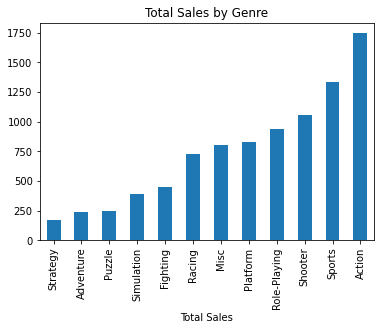

In [32]:
sales_by_genre = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=True)
sales_by_genre.plot(kind='bar')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales')
plt.show()

Mediante el gráfico de barras, se observa que el tipo de género con mayor rentabilidad corresponde a Action.

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

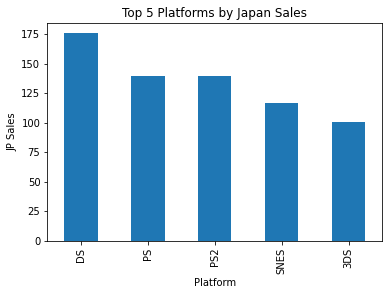

In [33]:
top_5_jp = games_df.groupby('platform')['jp_sales'].sum().nlargest(5)

# Se crea la grafica para ver el top5 de ventas en plataformas en Japón
top_5_jp.plot(kind='bar')

plt.title('Top 5 Platforms by Japan Sales')
plt.xlabel('Platform')
plt.ylabel('JP Sales')


plt.show()

La consola mayor vendida en Japón corresponde al Nintendo DS.

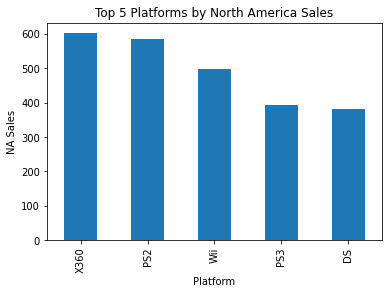

In [34]:
top_5_na = games_df.groupby('platform')['na_sales'].sum().nlargest(5)

# Se crea gráfico para ver el top5 de ventas por plataforma en Norteamérica
top_5_na.plot(kind='bar')

plt.title('Top 5 Platforms by North America Sales')
plt.xlabel('Platform')
plt.ylabel('NA Sales')

plt.show()


La gráfica de barras anterior muestra que la plataforma más vendida en Norteamérica es la X360, seguida por la PS2.

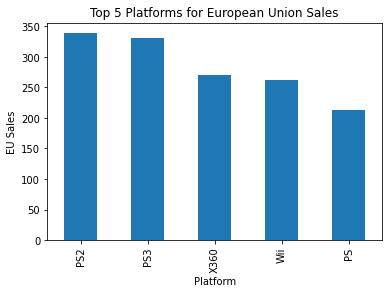

In [35]:
top_5_eu = games_df.groupby('platform')['eu_sales'].sum().nlargest(5)

# Se crea gráfico para ver el top5 de ventas de consolas en EU 
top_5_eu.plot(kind='bar')


plt.title('Top 5 Platforms for European Union Sales')
plt.xlabel('Platform')
plt.ylabel('EU Sales')

plt.show()

La gráfica superior arroja que la consola más vendida en Europa es el PS2.

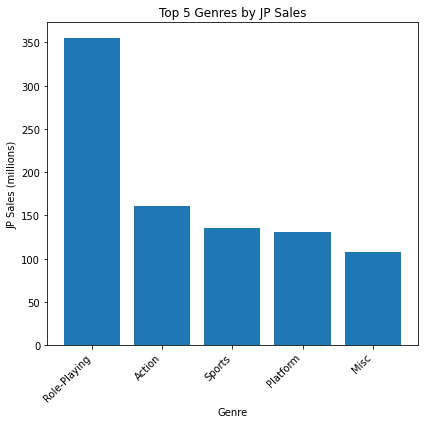

In [36]:
#Creación de df con la info de género y las ventas en Japón
top5_gen_jp = games_df.groupby('genre')['jp_sales'].sum().nlargest(5)

x_labels = top5_gen_jp.index.to_list()
y_values = top5_gen_jp.values.tolist()


plt.figure(figsize=(6, 6))
plt.bar(x_labels, y_values)
plt.xlabel('Genre')
plt.ylabel('JP Sales (millions)')
plt.title('Top 5 Genres by JP Sales')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

En Japón el género que más se vende corresponde al Role-Playing.

In [ ]:
#Se crea df con la info de las ventas por género en Norteamérica
top5_gen_na = games_df.groupby('genre')['na_sales'].sum().nlargest(5)


x_labels = top5_gen_na.index.to_list()
y_values = top5_gen_na.values.tolist()

plt.figure(figsize=(6, 6))
plt.bar(x_labels, y_values)
plt.xlabel('Genre')
plt.ylabel('North America Sales (millions)')
plt.title('Top 5 Genres by NA Sales')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


In [ ]:
El género más rentable en NA corresponde a Action.

In [ ]:
#Se crea df con la info de las ventas por género en la Unión Europea
top5_gen_eu = games_df.groupby('genre')['eu_sales'].sum().nlargest(5)


x_labels = top5_gen_na.index.to_list()
y_values = top5_gen_na.values.tolist()


plt.figure(figsize=(6, 6))
plt.bar(x_labels, y_values)
plt.xlabel('Genre')
plt.ylabel('EU Sales (millions)')
plt.title('Top 5 Genres by EU Sales')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Al igual que en NA, el género con mayores ganancias en EU es Action.

Se aprecia que comparando las 3 regiones, existe una diferencia en el tipo consolas que usan los consumidores, sólo la consola de PS se repite debido a su mayor diversidad en juegos.

En cuanto a la comparación por género de juego, se aprecia que Action es el más vendido en las 3 regiones, y hay 4 géneros que dominan todo el mercado; action, sport, role-playing y platform. Los géneros mencionados son recomendables para buscar aumentar la probabilidad de ganancias en las proyecciones.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Es necesario que el proyecto se ejecute en su totalidad en la plataforma. Es posible que la versión de la librería en la plataforma no reconozco los datos como los ingresaste.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
En esta sección, además de lo realizado, debes identificar los cinco juegos más populares, las cinco plataformas más populares y los géneros más populares por región. De esta forma sabremos qué vender y a quién. Ten presente que las plataformas que estás utilizando no son las más recomendables para las ventas. Haz este perfilamiento con el dataframe filtrado.
</div>

La consola más vendida en los usuarios de Japón es el DS, seguida por el PS2, mientras en NA la más vendida es el X360, seguida también por PS2. Las ventas son mayores en general en NA con mucha diferencia a como se comportan en Japón.

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

### Hipótesis 1:

1. Formulas la hipótesis nula y alternativa:

- H0: Las calificaciones promedio de los usuarios de Xbox One y PC son las mismas.
- H1: Las calificaciones promedio de los usuarios de Xbox One y PC son diferentes.

2. Obtener la infomación deseada.
 - Se requiere contar con los datos en dos series separadas y sin valores ausentes
   


In [ ]:
games_df['platform'].unique()

In [ ]:
score_xone = games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
score_pc = games_df[games_df['platform'] == 'PC']['user_score'].dropna()

3. Definir el test y el nivel de significancia.
- Usamos el nivel de significancia estandár de alpha de 0.5.
- Comparar 2 categorías (XOne y PC) con respecto a una variable númerica (user_score), en donde se desconocen las desviaciones estandár, por lo que se puede aplicar el t-test. 

In [ ]:
alpha = 0.5
stat, p_value = ttest_ind(
    score_xone,
    score_pc
)
print(f"""
    La clasificación promedio de profesionales para la Xbox es: {score_xone.mean()}
    La clasificación promedio de profesionales para la Xbox es: {score_pc.mean()}
    
    t-statistic: {stat}
    p-value {p_value}
""")

if p_value < alpha:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')              

Se prueba la hipótesis alternativa:

H1: Las calificaciones promedio de los usuarios de Xbox One y PC son diferentes.

### Hipótesis 2:

1. Formulas la hipótesis nula y alternativa:

- H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

2. Obtener la infomación deseada.
 - Se requiere contar con los datos en dos series separadas y sin valores ausentes

In [ ]:
games_df['genre'].unique()

In [ ]:
score_action = games_df[games_df['genre'] == 'Action']['user_score'].dropna()
score_sports = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

3. Definir el test y el nivel de significancia.
- Usamos el nivel de significancia estandár de alpha de 0.5.
- Comparar 2 categorías (Action y Sports) con respecto a una variable númerica (user_score), en donde se desconocen las desviaciones estandár, por lo que se puede aplicar el t-test. 

In [ ]:
alpha = 0.5
stat, p_value = ttest_ind(
    score_action,
    score_sports
)
print(f"""
    La clasificación promedio de profesionales para género de acción es: {score_action.mean()}
    La clasificación promedio de profesionales para género de deportes es: {score_sports.mean()}
    
    t-statistic: {stat}
    p-value {p_value}
""")

if p_value < alpha:
    print('Rechazamos nuestra hipótesis nula')
else:
    print('No rechazamos nuestra hipótesis nula')              

Se prueba la hipótesis alternativa:

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Realiza estas pruebas de hipótesis con el dataframe filtrado.
</div>

Paso 6. Escribe una conclusión general

-	El objetivo central del proyecto integrado es identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias. En base a lo mencionado anteriormente, el objetivo del proyecto es tratar de pronosticar las ventas del 2017, así como planear la campaña para dicho año
-	Primeramente se han importado todas las bibliotecas necesarias para el desarrollo del proyecto. A continuación se abre el atchivo de datos y se estudia la info en general.
-	En el paso 2, se reemplazaron los nombres de la columnas a minúsculas, se hizo una revisión de valores ausentes, se ha detectado que critic_score, user_score y rating son las que cuentan más valores de este tipo. Se recomienda que lo mejor es dejar los valores ausentes actuales o buscar en datos externos, debido al alto porcentaje, se puede correr el riesgo de alterar la distribución de los datos.
-	A continuación se observan los tipos de datos por columna, además de observar mediante describe, las medidas estadísticas por columna.
-	Después se revisaron los valores de la columna ‘user_score’ que tienen ‘tbd’ con el objetivo de cambiarlos por NAN. 
-	En la siguiente parte se calcula la mediana del año de lanzamiento para todos los juegos, y se calculan las ventas totales por región, con el objetivo de crear una nueva columna de ‘total_sales’.
-	En la parte se hace un cálculo de los juegos por año y se traza un gráfico de línea, en donde se observa que el pico alto de ventas se efectúa entre 2005-2010, después se calculan las ventas por plataforma, en donde se observa esta distribución:
 
-	Se crea una tabla de distribución por plataforma, con las columnas año de lanzamiento, plataforma y ventas. Y se crea un lineplot para observar las ventas según el año de lanzamiento por plataforma. Entre el 2000-2016, las consolas con mayores ventas fueron PS2, Wii, seguidas por X360.
-	Después se crea un diagrama de cajas por plataforma y ventas en donde se ve que el X360 y el PS3 son las consolas con mayores ventas en promedio con respecto a las demás consolas.
-	En el paso 4 se crea una tabla llamada market, para ver las ventas por región y por plataforma, y se saca una nueva tabla de market_sales donde se observa la plataforma, el mercado y las ventas por consola. Después con esta información se crea una tabla de barras para comparar gráficamente y de forma más clara, las ventas entre las regiones con mayores ventas y las ventas por consola, en donde la consola más vendida en los usuarios de Japón es DS, mientras en Norteamérica la más vendida es la X360.
-	Procedemos al paso 5 de las hipótesis en donde se prueban 2 hipótesis, la primera es:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. (H0)
 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. (H1)
-	Para poder trabajar con las hipótesis anteriores, se requiere contar con los datos en 2 series separadas y sin valores ausentes, así que se crean 2 variables para el promedio de usuarios de xone y de pc, en donde se usan las columnas platform y user_score y se filtran las plataformas de xone y pc, y a ambas variables se les eliminan los valores na con un drop.
-	Después se define el test y el nivel de significancia, se usa un valor Alpha de 0.5, se comparan las 2 categorías de consolas con respecto a una variable númerica que user_score y se aplica un t-test.
Se rechaza la hipótesis nula, y se aprueba la hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. (H1)
-	Continuamos con la hipótesis 2 del proyecto, la hipótesis nula es “Las calificaciones promedio de los usuarios para los géneros de acción y deportes son diferentes” y la alternativa es; “Las calificaciones promedio de los usuarios para los géneros de acción y deportes son las mismas”.
-	Para poder trabajar con las hipótesis anteriores, se requiere contar con los datos en 2 series separadas y sin valores ausentes, así que se crean 2 variables para el promedio de usuarios del género acción y deportes, en donde se usan las columnas genre y user_score y se filtran los géneros de action y sports, y a ambas variables se les eliminan los valores na con un drop.
-	Después se define el test y el nivel de significancia, se usa un valor Alpha de 0.5, se comparan las 2 categorías de géneros con respecto a una variable numérica que user_score y se aplica un t-test.
Se rechaza la hipótesis nula, y se aprueba la hipótesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. (H1)
-	Se recomienda planear campañas para venta de duración aproximada de cinco años, ya que el análisis de datos arrojó este comportamiento en las consolas, en donde se observa que la venta más alta de las plataformas es durante los primeros años de lanzamiento.



<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Tenemos problemas con la ejecución, Jorge. Continuaremos cuando se haya corregido el problema.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola, Jorge. No hemos hecho el filtro apropiado para la selección de la información. Esto es muy importante para el proyecto porque va a determinar las plataformas, los videojuegos y los géneros sobre los cuales enfocaremos nuestra atención, haremos el perfilamiento y las pruebas de hipótesis para realizar las recomendaciones de ventas para el año 2017.
</div>